## Heart Disease Predict Model

This model can be used to predict whether a patient has heart disease.

## DataSource

[Heart-disease-uci Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

## Features
* age, age: 年龄
* sex, sex: 性别
* cp, chest pain type (4 values): 胸痛类型(1: 典型心绞痛, 2: 非典型心绞痛, 3: 无心绞痛, 4: 无症状)
* trestbps, resting blood pressure: 静息血压
* chol, serum cholestoral in mg/dl: 血清胆固醇含量 毫克/分升（10dl = 1l）
* fbs, fasting blood sugar > 120 mg/dl:空腹血糖 > 120 mg/dl
* restecg, resting electrocardiographic results (values 0,1,2): 静息心电图结果
* thalac, maximum heart rate achieved: 最大心率
* exang, exercise induced angina: 运动性心绞痛
* oldpeak, oldpeak = ST depression induced by exercise relative to rest: 运动引起的相对静息状态的[ST段](https://en.wikipedia.org/wiki/ST_segment)压低
* slope, the slope of the peak exercise ST segment: 最大运动时ST段的斜率
* ca, number of major vessels (0-3) colored by flourosopy: 荧光镜透视下的主要血管数目
* thal, thal: 3 = normal; 6 = fixed defect; 7 = de defe: 地中海贫血（3=正常；6=固定缺陷；7=可逆缺陷）
* target: 是否患有心脏疾病 (0 = 否, 1 = 是)

In [3]:
import pandas as pd

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import altair as alt

In [4]:
def getData():
    path = "data/heart.csv"
    df = pd.read_csv(path)
    return df

In [5]:
df = getData()

featureNames = list(df.columns)
className = "target"
featureNames.remove(className)
featureNames.remove("fbs")

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
Xdata = df[featureNames]
ydata = df[className]

X = Xdata.values
y = ydata.values.flatten()

# r:train, t:test, v:valiad

rx,tx,ry,ty = model_selection.train_test_split(X,y,test_size=0.2)
# xv,xt,yv,yt = model_selection.train_test_split(X,y,test_size=0.5)


In [8]:

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn import metrics

# model = tree.DecisionTreeClassifier(max_leaf_nodes=10)
# model = GaussianNB()
# model = LogisticRegression(max_iter=3000)

def getFindex(arr, inverse=False):
    if inverse:
        return [featureNames.index(x) for x in featureNames if x not in arr]
    else:
        return [featureNames.index(x) for x in arr]


ct = ColumnTransformer(
[
    ("norm", preprocessing.StandardScaler(), getFindex(["cp", "thal"],inverse=True)),
    ("cate", preprocessing.OneHotEncoder(), getFindex(["cp", "thal"])),
])

pipe = Pipeline(
    [
        ("norm", preprocessing.StandardScaler()),
        ("model", LogisticRegression(max_iter=3000, penalty="l1", solver="liblinear"))
    ]
)

paramGrid = {
    "norm":[ct, preprocessing.StandardScaler()],
    "model__penalty":["l1","l2"]
}

gscv = model_selection.GridSearchCV(pipe, paramGrid, cv=5, scoring="f1")
gscv.fit(rx, ry)

for key in ['mean_test_score','std_test_score','rank_test_score']:
    print(f"{key}:{[round(x,2) for x in gscv.cv_results_[key]]}")
print(gscv.best_params_)


# pipe.set_params(norm=preprocessing.StandardScaler())
scores = model_selection.cross_val_score(pipe, rx, ry, cv=5, scoring="f1")
scoreMean,scoreStd = scores.mean(),scores.std()
print(f"Baseline Score:{scoreMean:.2f} +/-{scoreStd*1:.2f}")

mean_test_score:[0.86, 0.87, 0.87, 0.87]
std_test_score:[0.05, 0.04, 0.05, 0.04]
rank_test_score:[4, 2, 1, 2]
{'model__penalty': 'l2', 'norm': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('norm',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [0, 1, 3, 4, 5, 6, 7, 8, 9, 10]),
                                ('cate',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [2, 11])],
                  verbose=False)}
Baseline Score:0.87 +/-0.04


In [9]:
getFindex(["cp", "thal"],inverse=True)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
pipe.fit(rx,ry)
print(metrics.classification_report(pipe.predict(tx), ty))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.68      0.81      0.74        26

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.76        61



## Feature Plot

In [11]:


import numpy as np
newRx = ct.fit_transform(rx)
corr = [np.corrcoef(newRx[:,col], ry)[0,1] for col in range(newRx.shape[1])]
# ct.categories_
# ct.get_feature_names()
newFeatureNames = [x for x in featureNames if x not in ["cp", "thal"]] + list(ct.named_transformers_["cate"].get_feature_names(["cp", "thal"]))
len(corr)
len(newFeatureNames)

18

In [12]:
statdf = pd.DataFrame({"corr":corr,"feature":newFeatureNames})
statdf

alt.Chart(statdf).mark_bar().encode(
    alt.Y("feature:O",sort=None),
    alt.X("corr:Q"),
    tooltip="corr:Q"
)

alt.Chart(...)

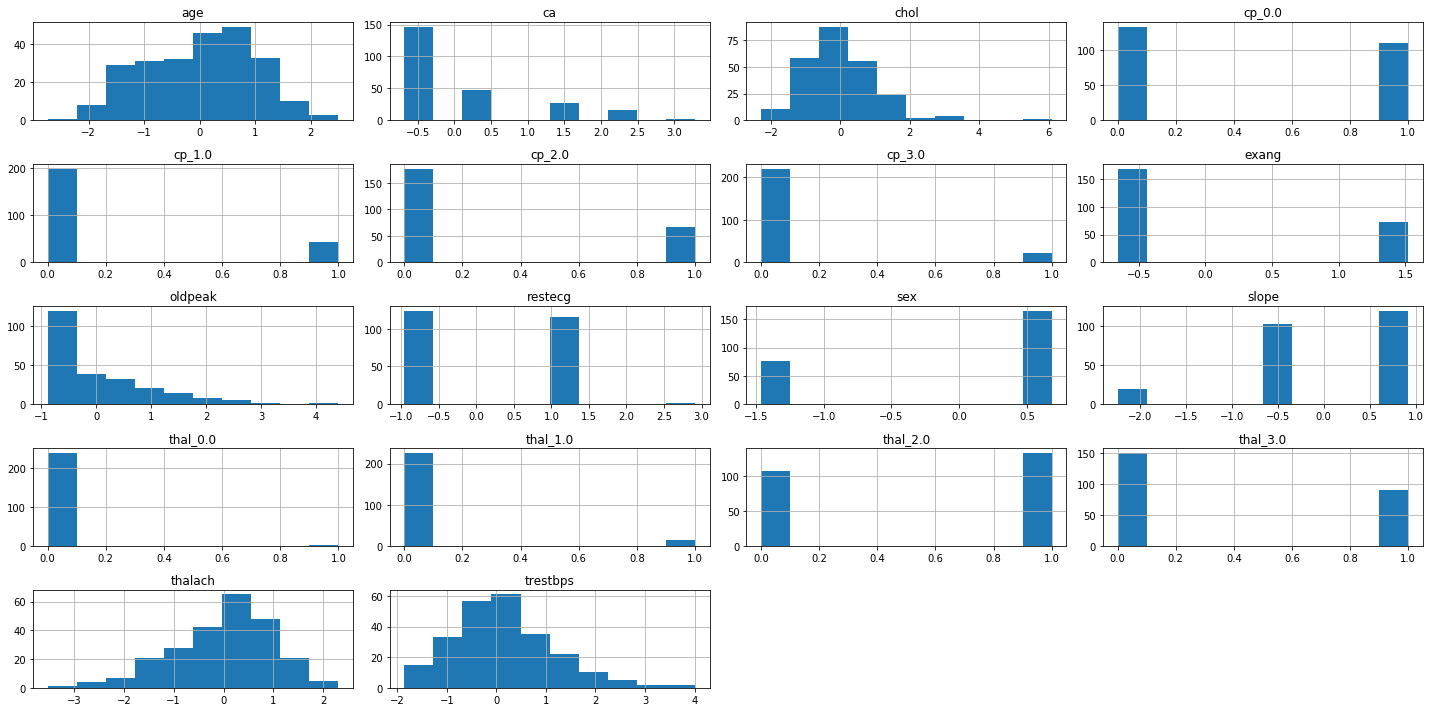

In [13]:
# plt.figure(figsize=(20,5))
axes = pd.DataFrame(newRx,columns=newFeatureNames).hist(figsize=(20,10))
plt.tight_layout()

In [14]:
groupMean = pd.DataFrame(newRx,columns=newFeatureNames).groupby(ry).mean().stack().reset_index()
groupMean.columns = ["target", "feature", "value"]
alt.Chart(groupMean).mark_bar().encode(
    x = "target:O",
    y = "value",
).facet(
    column="feature"
)

alt.FacetChart(...)

In [15]:
# groupMean = df.groupby("target").mean().stack().reset_index()
# groupMean.columns=["target","feature","mean"]

# table = df[featureNames].corrwith(df["target"]).reset_index()
# table.columns = ["feature","corrleation"]
# table = table.reset_index().round(2)

In [16]:
# meanChart = alt.Chart(groupMean).mark_bar().encode(
#     alt.Y("feature:N",sort=None),
#     alt.X("mean:Q",stack="normalize"),
#     color="target:N"
# ).properties(title="Mean Comparison between Targets")

In [17]:
# corrChart = alt.Chart(table).mark_bar().encode(
#     alt.Y("feature:N",sort=None),
#     alt.X("corrleation:Q"), 
#     tooltip="corrleation:N",
#     color=alt.condition(alt.datum.corrleation > 0,alt.value('skyblue'), alt.value('lightgray'))
# ).properties(title="Corrleation with Target")
# alt.concat(meanChart,corrChart).resolve_legend(color="independent")

## Train model

In [18]:
# ypredict = model.predict(Xtest)
# crossTabel = pd.crosstab(ytest, ypredict, rownames=["Actual"], colnames=["predict"])
# crossTabel

In [19]:
# from sklearn import model_selection

# scores = model_selection.cross_validate(model, X, y, cv=5, scoring='roc_auc')
# scoreMean,scoreStd = scores["test_score"].mean(),scores["test_score"].std()
# print(f"Score:{scoreMean:.2f} +-{scoreStd*1:.2f}")

In [20]:
# model.coef_

In [21]:
# plt.figure(figsize=(15,15))
# annotations = tree.plot_tree(model, feature_names=featureNames, class_names=["health", "weak"], filled=True, rounded=True)